In [1]:
import networkx as nx
from matplotlib import pyplot as plt

In [16]:
def findfirstmin(N):

    # Logic for finding minimum edge from graph
    min = (0,0)
    elist = list(N.edges)
    min = elist[0]
    for i in range(1,len(elist)):
        curr_edge = elist[i]

        curr_edge_weight = dict(N.adj[curr_edge[0]][curr_edge[1]])
        min_edge_weight = dict(N.adj[min[0]][min[1]])
        # print(curr_edge_weight['weight']) 
        if curr_edge_weight['weight'] < min_edge_weight['weight']:
            min = curr_edge
    # print(min)
    return min

def createMST(N):
    min = findfirstmin(N)
    min_w = dict(N.adj[min[0]][min[1]])
    MST = nx.Graph()
    MST.add_edge(min[0],min[1],weight=min_w['weight'])


    # print(list(MST.nodes()))
    # list(MST.edges())

    min_set = min
    min_set_weight = 0
    for i in range(len(N.edges())-1):
        mst_nodes = list(MST.nodes())
        print("mst nodes: ", mst_nodes)

        for n in range(len(mst_nodes)):
            curr_adj = list(N.adj[mst_nodes[n]])
            print("curr adj : ",curr_adj)
            for k in range(len(curr_adj)):
                f = mst_nodes[n]
                s = curr_adj[k]
                selected_set = (f,s)
                # print(mst_nodes[n],curr_adj[k])
                curr_edge_weight = N.adj[f][s]
                # print(curr_edge_weight['weight'])
                present_edges = list(N.edges)
                # print(present_edges)
                # print(selected_set)
                if s not in mst_nodes:
                    print(s)
                    # print(selected_set)
                    if min_set in list(MST.edges()):
                        min_set = selected_set
                        # print("executes")
                    else:
                        curr_edge_weight = N.adj[f][s]
                        min_edge_weight = N.adj[min_set[0]][min_set[1]]
                        if curr_edge_weight['weight'] <= min_edge_weight['weight']:
                            min_set = selected_set
                            min_set_weight = curr_edge_weight['weight']
        print("min set:",min_set)       
        MST.add_edge(min_set[0],min_set[1],weight=min_set_weight)
    print(MST.edges())
    labels = nx.get_edge_attributes(MST,'weight')
    pos = nx.spring_layout(MST)
    nx.draw_networkx_nodes(MST,pos)
    nx.draw_networkx_edges(MST,pos)
    nx.draw_networkx_edge_labels(MST,pos,edge_labels=labels)
    nx.draw_networkx_labels(MST,pos)   
    plt.savefig("mstgraph.png")  

mst nodes:  [1, 6]
curr adj :  [2, 6]
2
curr adj :  [1, 5]
5
min set: (6, 5)
mst nodes:  [1, 6, 5]
curr adj :  [2, 6]
2
curr adj :  [1, 5]
curr adj :  [7, 4, 6]
7
4
min set: (5, 4)
mst nodes:  [1, 6, 5, 4]
curr adj :  [2, 6]
2
curr adj :  [1, 5]
curr adj :  [7, 4, 6]
7
curr adj :  [3, 7, 5]
3
7
min set: (4, 3)
mst nodes:  [1, 6, 5, 4, 3]
curr adj :  [2, 6]
2
curr adj :  [1, 5]
curr adj :  [7, 4, 6]
7
curr adj :  [3, 7, 5]
7
curr adj :  [2, 4]
2
min set: (3, 2)
mst nodes:  [1, 6, 5, 4, 3, 2]
curr adj :  [2, 6]
curr adj :  [1, 5]
curr adj :  [7, 4, 6]
7
curr adj :  [3, 7, 5]
7
curr adj :  [2, 4]
curr adj :  [1, 3, 7]
7
min set: (2, 7)
mst nodes:  [1, 6, 5, 4, 3, 2, 7]
curr adj :  [2, 6]
curr adj :  [1, 5]
curr adj :  [7, 4, 6]
curr adj :  [3, 7, 5]
curr adj :  [2, 4]
curr adj :  [1, 3, 7]
curr adj :  [2, 4, 5]
min set: (2, 7)
mst nodes:  [1, 6, 5, 4, 3, 2, 7]
curr adj :  [2, 6]
curr adj :  [1, 5]
curr adj :  [7, 4, 6]
curr adj :  [3, 7, 5]
curr adj :  [2, 4]
curr adj :  [1, 3, 7]
curr ad

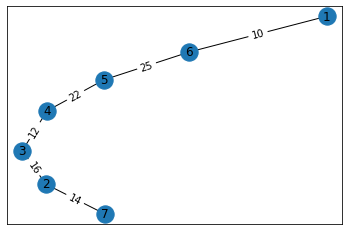

In [17]:
N = nx.Graph()

N.add_node(1)
N.add_node(2)
N.add_node(3)
N.add_node(4)
N.add_node(5)
N.add_node(6)
N.add_node(7)

N.add_edge(1,2,weight=28)
N.add_edge(1,6,weight=10)
N.add_edge(2,3,weight=16)
N.add_edge(2,7,weight=14)
N.add_edge(3,4,weight=12)
N.add_edge(4,7,weight=18)
N.add_edge(7,5,weight=24)
N.add_edge(5,4,weight=22)
N.add_edge(6,5,weight=25)

pos = nx.spring_layout(N)

labels = nx.get_edge_attributes(N,'weight')

nx.draw_networkx_nodes(N,pos)
nx.draw_networkx_edges(N,pos)
nx.draw_networkx_labels(N,pos)
nx.draw_networkx_edge_labels(N,pos,edge_labels=labels)
plt.savefig("graph.png")

createMST(N)

In [20]:
# Logic for finding minimum edge from graph

def findUsingKruskals(N):
    NMST = nx.Graph()
    mst_arr = []

    min = (0,0)
    elist = list(N.edges)
    for k in range(len(elist)):
        min = elist[0]
        min_edge_weight = dict(N.adj[min[0]][min[1]])
        for i in range(1,len(elist)):
            curr_edge = elist[i]
            # print(curr_edge)
            if curr_edge not in mst_arr:
                # print("curr edge:",curr_edge)
                curr_edge_weight = dict(N.adj[curr_edge[0]][curr_edge[1]])
                min_edge_weight = dict(N.adj[min[0]][min[1]])
                # print(curr_edge_weight['weight']) 
                if curr_edge_weight['weight'] < min_edge_weight['weight']:
                    has_in = False
                    second = False
                    for j in mst_arr:
                        # print("j=",j[1],"ce=",curr_edge[0])
                        if j[1] == curr_edge[0]:
                            has_in = True
                        if j[1] == curr_edge[1]:
                            second = True
                    if has_in != second:
                        # print(has_in)
                        min = curr_edge
                        min_edge_weight = curr_edge_weight['weight']
        # print(min)
        mst_arr.append((min[0],min[1]))
        # NMST.add_edge(min[0],min[1],weight=min_edge_weight)
    # print(NMST.edges())
    # print(mst_arr.count(min))
    for i in range(mst_arr.count(min)):
        mst_arr.remove(min)
    print(mst_arr)
    NMST.add_edges_from(mst_arr)
    NMST.edges()
    pos = nx.spring_layout(NMST)
    nx.draw_networkx_nodes(NMST,pos)
    nx.draw_networkx_edges(NMST,pos)
    nx.draw_networkx_labels(NMST,pos)
    plt.savefig('kruskals.png')

[(2, 7), (2, 3), (3, 4), (4, 5), (5, 6), (1, 6)]


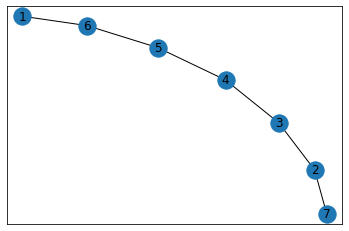

In [21]:
findUsingKruskals(N)